In [90]:
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA

In [24]:
def load_CoVoST2(data_path):
    data = np.load(data_path+'/speech_trn.npz', allow_pickle=True)
    Xtrn, Ytrn = data['Xtrn'], data['Ytrn']
    data = np.load(data_path+'/speech_tst.npz', allow_pickle=True)
    Xtst, Ytst = data['Xtst'], data['Ytst']
    return Xtrn, Ytrn, Xtst, Ytst

In [25]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "\data"
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2(path)

In [18]:
# random state = 1

In [28]:
km = KMeans(n_clusters = 22, random_state = 1)

In [33]:
km.fit(Xtrn, Ytrn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [102]:
centers = km.cluster_centers_

In [48]:
# centers.shape (22, 26), Xtrn.shape (22000, 26)

In [62]:
l0, l1, l2, l3, l4, l5, l6, l7, l8, l9 = [], [], [], [], [], [], [], [], [], []
l10, l11, l12, l13, l14, l15, l16, l17, l18, l19, l20, l21 = [], [], [], [], [], [], [], [], [], [], [], []
for row in range(Xtrn.shape[0]):
    if Ytrn[row] == 0:
        l0.append(Xtrn[row])
    if Ytrn[row] == 1:
        l1.append(Xtrn[row])
    if Ytrn[row] == 2:
        l2.append(Xtrn[row])
    if Ytrn[row] == 3:
        l3.append(Xtrn[row])
    if Ytrn[row] == 4:
        l4.append(Xtrn[row])
    if Ytrn[row] == 5:
        l5.append(Xtrn[row])
    if Ytrn[row] == 6:
        l6.append(Xtrn[row])
    if Ytrn[row] == 7:
        l7.append(Xtrn[row])
    if Ytrn[row] == 8:
        l8.append(Xtrn[row])
    if Ytrn[row] == 9:
        l9.append(Xtrn[row])
    if Ytrn[row] == 10:
        l10.append(Xtrn[row])
    if Ytrn[row] == 11:
        l11.append(Xtrn[row])
    if Ytrn[row] == 12:
        l12.append(Xtrn[row])
    if Ytrn[row] == 13:
        l13.append(Xtrn[row])
    if Ytrn[row] == 14:
        l14.append(Xtrn[row])
    if Ytrn[row] == 15:
        l15.append(Xtrn[row])
    if Ytrn[row] == 16:
        l16.append(Xtrn[row])
    if Ytrn[row] == 17:
        l17.append(Xtrn[row])
    if Ytrn[row] == 18:
        l18.append(Xtrn[row])
    if Ytrn[row] == 19:
        l19.append(Xtrn[row])
    if Ytrn[row] == 20:
        l20.append(Xtrn[row])
    if Ytrn[row] == 21:
        l21.append(Xtrn[row])

In [51]:
pca = PCA(2)

In [74]:
mean0 = np.mean(l0, axis=0) # (26,)
mean1 = np.mean(l1, axis=0)
mean2 = np.mean(l2, axis=0)
mean3 = np.mean(l3, axis=0)
mean4 = np.mean(l4, axis=0)
mean5 = np.mean(l5, axis=0)
mean6 = np.mean(l6, axis=0)
mean7 = np.mean(l7, axis=0)
mean8 = np.mean(l8, axis=0)
mean9 = np.mean(l9, axis=0)
mean10 = np.mean(l10, axis=0)
mean11 = np.mean(l11, axis=0)
mean12 = np.mean(l12, axis=0)
mean13 = np.mean(l13, axis=0)
mean14 = np.mean(l14, axis=0)
mean15 = np.mean(l15, axis=0)
mean16 = np.mean(l16, axis=0)
mean17 = np.mean(l17, axis=0)
mean18 = np.mean(l18, axis=0)
mean19 = np.mean(l19, axis=0)
mean20 = np.mean(l20, axis=0)
mean21 = np.mean(l21, axis=0)
means = [mean0, mean1, mean2, mean3, mean4, mean5, mean6, mean7, mean8, mean9, mean10, mean11, mean12, mean13, mean14, mean15, mean16, mean17, mean18, mean19, mean20, mean21]

In [81]:
# means = 22 things of (26,)

In [82]:
pca.fit(means)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
new = pca.transform(means)

In [86]:
component1 = new[:,0]
component2 = new[:,1]

In [118]:
pca1 = []
for i in range(new.shape[0]):
    pca1.append(new[i, 0])
pca2 = []
for j in range(new.shape[0]):
    pca2.append(new[j,1])

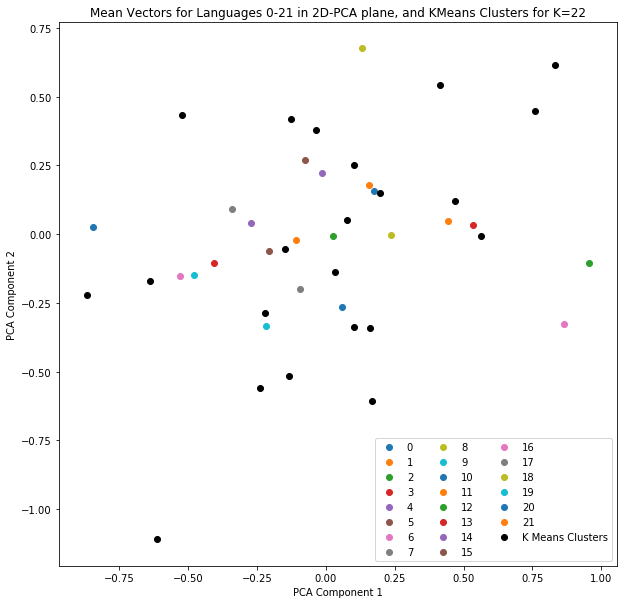

In [140]:
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
for x_,y_,label in zip(pca1,pca2,labels):
    ax.scatter([x_], [y_], label=label)
plt.scatter(centers[:,0], centers[:,1], label="K Means Clusters", color="black")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Mean Vectors for Languages 0-21 in 2D-PCA plane, and KMeans Clusters for K=22")
plt.legend(ncol=3)
plt.savefig("3_2.png")
plt.show()